#                                  Used Bike Price Prediction

In [704]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [705]:
#Reading dataset
data=pd.read_csv('bike_data.csv')

In [706]:
data.head()

,Unnamed: 0,Name,Price,Location,Running,Owner
0,0,TVS Star City Plus Dual Tone 110cc 2018,"35,000",Ahmedabad,"17,654 Km",First Owner
1,1,Royal Enfield Classic 350cc 2017,"1,19,900",Delhi,"11,000 Km",First Owner
2,2,Triumph Daytona 675R 2013,"6,00,000",Delhi,110 Km,First Owner
3,3,TVS Apache RTR 180cc 2017,"65,000",Bangalore,"16,329 Km",First Owner
4,4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,"80,000",Bangalore,"10,000 Km",First Owner


In [707]:
data['Owner'].unique()

array(['First Owner', 'Second Owner', nan, 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [708]:
#Dataframe has one extra column "Unnamed: 0" so dropping that column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [709]:
print(data.shape)

(34500, 5)


In [710]:
data.info()
#As we can see that the feature 'Price' and 'Running' are also of type object so it is needed to be converted to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      34500 non-null  object
 1   Price     34500 non-null  object
 2   Location  34492 non-null  object
 3   Running   34473 non-null  object
 4   Owner     32974 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [711]:
#Checking for the missing values
#Although I have collected data by myself there is a possilbilty that some data will be missing if the data itself is missing on website
data.isnull().sum()

Name           0
Price          0
Location       8
Running       27
Owner       1526
dtype: int64

In [712]:
data['Owner'].value_counts()

First Owner             30262
Second Owner             2586
Third Owner               110
Fourth Owner Or More       16
Name: Owner, dtype: int64

In [713]:
#Filling the nan values as 'Second Owner'
#You can fill it with some other value or can drop it
data['Owner']=data['Owner'].fillna('First Owner')

In [714]:
#Now the feature 'Location' and 'Running' has vey few missing values so we can drop them
data.dropna(inplace=True)

In [715]:
#Since the entries in the 'Running' column contains the unit Km it cannot be converted to int, therefore
#removing the unit and renaming the column as 'Running(Km)'
data['Running']=data['Running'].apply(lambda x: x.split(' ')[0])


In [716]:
#The the ',' symbol from price and running column
data['Price']=data['Price'].apply(lambda x: x.replace(',',''))
data['Running']=data['Running'].apply(lambda x: x.replace(',',''))

In [717]:
pd.set_option('display.max_rows',None)
data.head()

,Name,Price,Location,Running,Owner
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner


In [718]:
#While going through the dataset I observed that some entries in 'Price' column has multiple and a '\n' symbol
#So splitting the entry inorder to get single value
data['Price']=data['Price'].apply(lambda x: x.split("\n")[0])

In [719]:
#Converting Price feature to int type
data['Price']=pd.to_numeric(data['Price'])

In [720]:
#Converting Running(Km) feature to int type
data['Running']=pd.to_numeric(data['Running'])

In [721]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34465 entries, 0 to 34499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      34465 non-null  object
 1   Price     34465 non-null  int64 
 2   Location  34465 non-null  object
 3   Running   34465 non-null  int64 
 4   Owner     34465 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


#### Creating new features from existing features

Here we will be using regular expression method on 'Name' column to obtain the cubic capacity of bike and the year in which the bike was bought. To learn more about regular expression you see visit Corey Schafer's channel(https://www.youtube.com/watch?v=K8L6KVGG-7o).

In [722]:
#Deriving Cubic Capacity from 'Name' column
data['Cubic_Capacity']=data.Name.str.extract(r'(\d\d\d)',expand=False)

In [723]:
#Checking all the unique values
data['Cubic_Capacity'].unique()

array(['110', '350', '675', '180', '150', '160', '100', '500', '250',
       '200', '125', '302', '201', '220', '390', '600', '900', '650',
       '223', '410', '135', '765', '300', '129', '750', '400', '130',
       '821', '119', '883', '959', '295', '320', '310', '899', '535',
       '113', '120', '105', '800', '126', '170', '175', '797', '796',
       '149', '202', '109', '502', '107'], dtype=object)

In [724]:
#Converting into int type
data['Cubic_Capacity']=pd.to_numeric(data['Cubic_Capacity'])

In [725]:
data['Cubic_Capacity'].shape

(34465,)

In [726]:
data.head()

,Name,Price,Location,Running,Owner,Cubic_Capacity
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner,675
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150


In [727]:
#Deriving year from 'Name' column
data['Year']=data.Name.str.extract(r'(\d\d\d\d)',expand=False)

In [728]:
#Converting into int type
data['Year']=pd.to_numeric(data['Year'])

In [729]:
data['Year'].shape

(34465,)

In [730]:
data.head()

,Name,Price,Location,Running,Owner,Cubic_Capacity,Year
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner,675,2013
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018


In [731]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34465 entries, 0 to 34499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            34465 non-null  object
 1   Price           34465 non-null  int64 
 2   Location        34465 non-null  object
 3   Running         34465 non-null  int64 
 4   Owner           34465 non-null  object
 5   Cubic_Capacity  34465 non-null  int64 
 6   Year            34465 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [732]:
#Creating a new list for model of the bike. I have used some if else statements based on the domain knowledge I had
#You can use some other technique
#NOTE: I tried to separate the company name and the model but that was way too much difficult by using split method as
##the index of the company name and model are not fixed. And it will create large number of categories which will be difficult 
##to encode even with count frequency encoding.
model=[]
for mod in data.Name:
    
    name=mod.split(' ')
    if 'Honda' and 'CB' in mod:
        model.append(name[0]+' '+name[1]+' '+name[2])
    elif 'FZ' and '2.0' in mod:
         model.append(name[0]+' '+name[1]+' V 2.0')
    elif  'Triumph Street' in mod:
        model.append(name[0]+' '+name[1]+' '+name[2])
    elif 'BMW G 310' in mod:
        model.append(name[0]+' '+name[1]+' '+name[2]+' '+name[3])
    else:
        model.append(name[0]+' '+name[1])

In [733]:
#Adding our model list in the dataframe
data['Model']=model

In [734]:
data.head()

,Name,Price,Location,Running,Owner,Cubic_Capacity,Year,Model
0,TVS Star City Plus Dual Tone 110cc 2018,35000,Ahmedabad,17654,First Owner,110,2018,TVS Star
1,Royal Enfield Classic 350cc 2017,119900,Delhi,11000,First Owner,350,2017,Royal Enfield
2,Triumph Daytona 675R 2013,600000,Delhi,110,First Owner,675,2013,Triumph Daytona
3,TVS Apache RTR 180cc 2017,65000,Bangalore,16329,First Owner,180,2017,TVS Apache
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,80000,Bangalore,10000,First Owner,150,2018,Yamaha FZ V 2.0


In [735]:
#Checking for the unique values
data['Model'].value_counts()

Bajaj Avenger                4857
Bajaj Pulsar                 4221
Royal Enfield                4220
Hero Passion                 2867
Yamaha Fazer                 1291
TVS Apache                   1061
KTM RC                        839
Yamaha YZF-R15 V 2.0          776
Bajaj Platina                 735
Bajaj Dominar                 729
Harley-Davidson Street        724
Hero CD                       708
Honda CB Hornet               705
Hero CBZ Xtreme               690
Honda CB Trigger              681
Yamaha FZ                     670
Hero Hunk                     660
Hero Super                    655
Hyosung GT250R                646
TVS Victor                    622
Suzuki Slingshot              617
Yamaha SZ-RR                  613
Suzuki Zeus                   608
Hero Splendor                 430
Bajaj Discover                397
KTM Duke                      261
Honda CB Shine                192
Suzuki Gixxer                 176
Bajaj V15                     161
Yamaha YZF-R15

In [736]:
len(data['Model'].unique())

186

In [737]:
#Since there are 186 different categories it is not recommended to use one hot encoding so I will be using count freuqency 
#encoding. To learn more about count frequency encoding you can visit 
#Krish Naik's channel(https://www.youtube.com/watch?v=MPnNC6kkNC4)
#In count frequqncy 2 categories should not have same number of counts. So I dropped the entry with counts of same number.
#Many of them were present below the count of 10
#You can try something else
data = data[data.groupby('Model').Model.transform('count')>10].copy() 

In [738]:
print(len(data['Model'].unique()))
print(data['Model'].unique())

70
['TVS Star' 'Royal Enfield' 'TVS Apache' 'Yamaha FZ V 2.0' 'Yamaha FZs'
 'Honda CB Hornet' 'Hero Splendor' 'Yamaha YZF-R15 V 2.0' 'Yamaha FZ25'
 'Bajaj Pulsar' 'Bajaj Discover' 'Suzuki Gixxer' 'UM Renegade'
 'Hero Super' 'Honda CBF Stunner' 'Bajaj Avenger' 'KTM RC'
 'Honda CB Unicorn' 'KTM Duke' 'Honda CBR 150R' 'Mahindra Centuro'
 'Hero Hunk' 'Yamaha FZ' 'Royal Enfield\u200e' 'Honda CB Shine'
 'Benelli TNT' 'Honda Dream' 'Hero CD' 'Kawasaki Ninja' 'Bajaj Platina'
 'Hero Karizma' 'Harley-Davidson Street' 'Bajaj CT' 'Yamaha FZ16'
 'Bajaj V15' 'Honda CBR 250R' 'Hyosung GT650R' 'Yamaha YZF-R15'
 'Honda CB ShineSP' 'Hero Passion' 'Bajaj Dominar' 'Yamaha Fazer'
 'Harley-Davidson Iron' 'Hero HF' 'TVS Sport' 'Honda Livo' 'Yamaha SZ-RR'
 'Yamaha Saluto' 'Hyosung Aquila' 'Bajaj V12' 'Honda CB Twister'
 'Harley-Davidson Fat' 'Suzuki Intruder' 'Mahindra Mojo' 'Hero Ignitor'
 'Hero Glamour' 'Suzuki Slingshot' 'Honda CB Trigger' 'Hyosung GT250R'
 'Hero Xtreme' 'Yamaha SZR' 'Hero CBZ 150cc' 'Yama

In [739]:
data['Model']=data['Model'].apply(lambda x: x.replace('Royal Enfield\u200e','Royal Enfield'))

In [740]:
data['Model'].value_counts()

Bajaj Avenger             4857
Royal Enfield             4249
Bajaj Pulsar              4221
Hero Passion              2867
Yamaha Fazer              1291
TVS Apache                1061
KTM RC                     839
Yamaha YZF-R15 V 2.0       776
Bajaj Platina              735
Bajaj Dominar              729
Harley-Davidson Street     724
Hero CD                    708
Honda CB Hornet            705
Hero CBZ Xtreme            690
Honda CB Trigger           681
Yamaha FZ                  670
Hero Hunk                  660
Hero Super                 655
Hyosung GT250R             646
TVS Victor                 622
Suzuki Slingshot           617
Yamaha SZ-RR               613
Suzuki Zeus                608
Hero Splendor              430
Bajaj Discover             397
KTM Duke                   261
Honda CB Shine             192
Suzuki Gixxer              176
Bajaj V15                  161
Yamaha YZF-R15             148
Hero HF                    137
Yamaha FZs                 131
UM Reneg

In [741]:
###There were few entries left with the same count so I took the indexes of them and dropped them in such manner
###that the count is not same
#data[data['Model'] == 'Suzuki Intruder']
#data[data['Model'] == 'Hero Ignitor']
#data[data['Model'] == 'Yamaha SZR']
#data[data['Model'] == 'Hyosung Aquila']
#data[data['Model'] == 'Harley-Davidson Fat']
data[data['Model'] == 'Hyosung GT650R']

,Name,Price,Location,Running,Owner,Cubic_Capacity,Year,Model
120,Hyosung GT650R 2017,400000,Delhi,1800,First Owner,650,2017,Hyosung GT650R
633,Hyosung GT650R 2013,230000,Dadra & Nagar Haveli,16150,Second Owner,650,2013,Hyosung GT650R
648,Hyosung GT650R 2015,395000,Nashik,5000,First Owner,650,2015,Hyosung GT650R
1372,Hyosung GT650R 2016,350000,Ranchi,2500,First Owner,650,2016,Hyosung GT650R
1502,Hyosung GT650R 2016,350000,Ranchi,2500,First Owner,650,2016,Hyosung GT650R
1656,Hyosung GT650R 2017,493500,Ahmedabad,7500,First Owner,650,2017,Hyosung GT650R
1666,Hyosung GT650R 2017,493500,Ahmedabad,7500,First Owner,650,2017,Hyosung GT650R
6186,Hyosung GT650R 2015,307194,Faridabad,1487,First Owner,650,2015,Hyosung GT650R
6230,Hyosung GT650R 2015,350000,Faridabad,1487,First Owner,650,2015,Hyosung GT650R
6603,Hyosung GT650R 2015,350000,Faridabad,1487,First Owner,650,2015,Hyosung GT650R


In [742]:
data.drop(index=[9082,9911,9314,9381,9359,7957,9809],axis=0,inplace=True)

In [743]:
data['Model'].value_counts()

Bajaj Avenger             4857
Royal Enfield             4249
Bajaj Pulsar              4221
Hero Passion              2867
Yamaha Fazer              1291
TVS Apache                1061
KTM RC                     839
Yamaha YZF-R15 V 2.0       776
Bajaj Platina              735
Bajaj Dominar              729
Harley-Davidson Street     724
Hero CD                    708
Honda CB Hornet            705
Hero CBZ Xtreme            690
Honda CB Trigger           681
Yamaha FZ                  670
Hero Hunk                  660
Hero Super                 655
Hyosung GT250R             646
TVS Victor                 622
Suzuki Slingshot           617
Yamaha SZ-RR               613
Suzuki Zeus                608
Hero Splendor              430
Bajaj Discover             397
KTM Duke                   261
Honda CB Shine             192
Suzuki Gixxer              176
Bajaj V15                  161
Yamaha YZF-R15             148
Hero HF                    137
Yamaha FZs                 131
UM Reneg

In [744]:
#Rearranging the columns
data=data[['Name','Model','Cubic_Capacity','Year','Location','Running','Owner','Price']]

In [745]:
data.head()

,Name,Model,Cubic_Capacity,Year,Location,Running,Owner,Price
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,Ahmedabad,17654,First Owner,35000
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,Delhi,11000,First Owner,119900
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,Bangalore,16329,First Owner,65000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,Bangalore,10000,First Owner,80000
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,Delhi,25000,First Owner,53499


#### Encoding

In [746]:
#One hot encoding for 'Owner' feature
Owners=data['Owner']
Owners=pd.get_dummies(Owners,drop_first=True)

In [747]:
data=pd.concat([data,Owners],axis=1)

In [748]:
#Count frequency encoding
#Making dictionary of key=model and value=count
#To learn more about count frequency encoding you can visit 
#Krish Naik's channel(https://www.youtube.com/watch?v=MPnNC6kkNC4)
model_dict=data['Model'].value_counts().to_dict()

In [749]:
model_dict

{'Bajaj Avenger': 4857,
 'Royal Enfield': 4249,
 'Bajaj Pulsar': 4221,
 'Hero Passion': 2867,
 'Yamaha Fazer': 1291,
 'TVS Apache': 1061,
 'KTM RC': 839,
 'Yamaha YZF-R15 V 2.0': 776,
 'Bajaj Platina': 735,
 'Bajaj Dominar': 729,
 'Harley-Davidson Street': 724,
 'Hero CD': 708,
 'Honda CB Hornet': 705,
 'Hero CBZ Xtreme': 690,
 'Honda CB Trigger': 681,
 'Yamaha FZ': 670,
 'Hero Hunk': 660,
 'Hero Super': 655,
 'Hyosung GT250R': 646,
 'TVS Victor': 622,
 'Suzuki Slingshot': 617,
 'Yamaha SZ-RR': 613,
 'Suzuki Zeus': 608,
 'Hero Splendor': 430,
 'Bajaj Discover': 397,
 'KTM Duke': 261,
 'Honda CB Shine': 192,
 'Suzuki Gixxer': 176,
 'Bajaj V15': 161,
 'Yamaha YZF-R15': 148,
 'Hero HF': 137,
 'Yamaha FZs': 131,
 'UM Renegade': 128,
 'Honda CB Unicorn': 126,
 'Bajaj CT': 107,
 'TVS Star': 102,
 'Hero Karizma': 99,
 'Yamaha FZ V 2.0': 93,
 'Honda CBF Stunner': 79,
 'Honda CBR 150R': 75,
 'Honda CBR 250R': 73,
 'TVS Sport': 68,
 'Honda Dream': 67,
 'Hero Glamour': 56,
 'Yamaha FZ16': 53,
 'B

In [750]:
#Adding a column to dataframe with the value count of each model
data['Bike_Model']=data['Model'].map(model_dict)

In [751]:
data.head()

,Name,Model,Cubic_Capacity,Year,Location,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,Ahmedabad,17654,First Owner,35000,0,0,0,102
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,Delhi,11000,First Owner,119900,0,0,0,4249
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,Bangalore,16329,First Owner,65000,0,0,0,1061
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,Bangalore,10000,First Owner,80000,0,0,0,93
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,Delhi,25000,First Owner,53499,0,0,0,131


##### Handling location feature
The location column has many unique many values.
As some user have entered their city some have entered district and some have entered state.
To reduce the number of the unique values I have converted the the city and district into its state name.
For this converion I used 2001 Census data (http://censusindia.gov.in/Tables_Published/Admin_Units/Admin_links/Town_Codes_2001.xls)

In [752]:
len(data['Location'].unique())

475

In [753]:
data.Location.unique()

array(['Ahmedabad', 'Delhi', 'Bangalore', 'Mumbai', 'Bhubaneshwar',
       'Kalyan', 'Faridabad', 'Hyderabad', 'Kaithal', 'Gurgaon', 'Pune',
       'Noida', 'Nashik', 'Kochi', 'Allahabad', 'Samastipur', 'Nadiad',
       'Lucknow', 'Jaipur', 'Karnal', 'Gorakhpur', 'Hosur', 'Baripara',
       'Agra', 'Dharwad', 'Vadodara', 'Jalandhar', 'Surat', 'Chennai',
       'Navi Mumbai', 'Gandhidham', 'Visakhapatnam', 'Thrissur',
       'Kolkata', 'Ernakulam', 'Ghaziabad', 'Amritsar', 'Bagalkot',
       'Hamirpur(hp)', 'Kottayam', 'Arrah', 'Patiala', 'Ranga Reddy',
       'Mandi', 'Gwalior', 'Ludhiana', 'Mandya', 'Siliguri', 'Aurangabad',
       'Kanpur', 'Bhilwara', 'Korba', 'Meerut', 'Rewari', 'Ahmednagar',
       'Wardha', 'Chandigarh', 'Ranchi', 'Coimbatore', 'Panvel', 'Thane',
       'Jabalpur', 'Kota', 'Rohtak', 'Rajkot', 'Haridwar', 'Varanasi',
       '24 Pargana', 'Banka', 'Nagpur', 'Pali', 'Chhatarpur', 'Katihar',
       'Rudrapur', 'Jajpur', 'Mysore', 'Adoni', 'Bikaner', 'Malout',
       

In [754]:
#Reading census data
census=pd.read_excel('census.xls',sheet_name='Sheet1')

In [755]:
census.head()

,Code List of Cities/Towns (in alphabetical order): 2001,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sl. No.,City/Town,Urban Status,State Code,State/ ...,District Code,District
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6,7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [756]:
census.columns

Index(['Code List of Cities/Towns (in alphabetical order): 2001', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [757]:
#Renaming columns
census.rename(columns={'Code List of Cities/Towns (in alphabetical order): 2001':'Drop',
                           'Unnamed: 1':'City','Unnamed: 2':'Drop1','Unnamed: 3':'Drop2',
                           'Unnamed: 4':'State','Unnamed: 5':'d3','Unnamed: 6':'District'},inplace=True)

In [758]:
census.head(10)

,Drop,City,Drop1,Drop2,State,d3,District
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sl. No.,City/Town,Urban Status,State Code,State/ ...,District Code,District
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6,7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1 SGM,C.T.,8,Rajasthan,1,Ganganagar
6,2,3 STR,C.T.,8,Rajasthan,1,Ganganagar
7,3,A.Thirumuruganpoondi,T.P.,33,Tamil Nadu,12,Coimbatore
8,4,A.Vellalapatti,T.P.,33,Tamil Nadu,24,Madurai
9,5,Aadityana,C.T.,24,Gujarat,11,Porbandar


In [759]:
#Dropping the columns which are not required
census.drop(['Drop','Drop1','Drop2','d3'],axis=1,inplace=True)

In [760]:
census.head(10)

,City,State,District
0,NaN,NaN,NaN
1,City/Town,State/ ...,District
2,NaN,NaN,NaN
3,2,5,7
4,NaN,NaN,NaN
5,1 SGM,Rajasthan,Ganganagar
6,3 STR,Rajasthan,Ganganagar
7,A.Thirumuruganpoondi,Tamil Nadu,Coimbatore
8,A.Vellalapatti,Tamil Nadu,Madurai
9,Aadityana,Gujarat,Porbandar


In [761]:
#Few rows from head and tail contains some different information so dropping them
census.drop(census.index[:5],inplace=True)
census.drop(census.index[5161:],inplace=True)

In [762]:
census.head()

,City,State,District
5,1 SGM,Rajasthan,Ganganagar
6,3 STR,Rajasthan,Ganganagar
7,A.Thirumuruganpoondi,Tamil Nadu,Coimbatore
8,A.Vellalapatti,Tamil Nadu,Madurai
9,Aadityana,Gujarat,Porbandar


In [763]:
census['State'].unique()

array(['Rajasthan', 'Tamil Nadu', 'Gujarat', 'Assam', 'Punjab',
       'Jammu & Kashmir', 'Maharashtra', 'Uttar Pradesh',
       'Andhra Pradesh', 'Karnataka', 'Jharkhand', 'Kerala',
       'West Bengal', 'Madhya Pradesh', 'Tripura', 'Chhattisgarh',
       'Mizoram', 'Goa', 'Delhi *', 'Uttaranchal', 'Arunachal Pradesh',
       'Bihar', 'Haryana', 'Lakshadweep *', 'Dadra & Nagar Haveli *',
       'Orissa', 'Manipur', 'Himachal Pradesh', 'Meghalaya',
       'Andaman & Nicobar Islands *', 'Chandigarh *', 'Nagaland',
       'Daman & Diu *', 'Sikkim', 'Pondicherry *'], dtype=object)

In [764]:
import pprint

In [765]:
#Making a dictionary where key=city and value=state

state_dict={}
for state,city in census.groupby('State').City:
    c=list(city)
    for cc in c:
        state_dict.update({cc: state})

#pprint.pprint(state1)

In [766]:
#Making a dictionary where key=district and value=state

district_dict={}
for state,district in census.groupby('State').District:
    d=list(district)
    for dd in d:
        district_dict.update({dd: state})

In [767]:
#I have done trial and error so I didn't wanted to mess with original dataframe that's created a copy
dataset=data.copy()

In [768]:
dataset.head()

,Name,Model,Cubic_Capacity,Year,Location,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,Ahmedabad,17654,First Owner,35000,0,0,0,102
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,Delhi,11000,First Owner,119900,0,0,0,4249
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,Bangalore,16329,First Owner,65000,0,0,0,1061
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,Bangalore,10000,First Owner,80000,0,0,0,93
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,Delhi,25000,First Owner,53499,0,0,0,131


In [769]:
#Making a list 'Place' using the state_dict
Place=[]
for p in dataset['Location']:
    
    Place.append(state_dict.get(p,'Not found'))

In [770]:
#Adding column to dataframe
dataset['Place']=Place

In [771]:
dataset.head()

,Name,Model,Cubic_Capacity,Year,Location,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Place
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,Ahmedabad,17654,First Owner,35000,0,0,0,102,Gujarat
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,Delhi,11000,First Owner,119900,0,0,0,4249,Not found
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,Bangalore,16329,First Owner,65000,0,0,0,1061,Karnataka
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,Bangalore,10000,First Owner,80000,0,0,0,93,Karnataka
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,Delhi,25000,First Owner,53499,0,0,0,131,Not found


In [772]:
dataset['Place'].unique()

array(['Gujarat', 'Not found', 'Karnataka', 'Haryana', 'Uttar Pradesh',
       'Maharashtra', 'Kerala', 'Bihar', 'Rajasthan', 'Tamil Nadu',
       'Punjab', 'Andhra Pradesh', 'West Bengal', 'Himachal Pradesh',
       'Madhya Pradesh', 'Chhattisgarh', 'Chandigarh *', 'Jharkhand',
       'Uttaranchal', 'Jammu & Kashmir', 'Assam', 'Sikkim', 'Orissa',
       'Goa', 'Pondicherry *', 'Tripura', 'Arunachal Pradesh',
       'Meghalaya'], dtype=object)

In [773]:
#Collecting rows with 'Not found' value
correction=dataset[dataset['Place'] == 'Not found'].Location

In [774]:
correction.unique()

array(['Delhi', 'Mumbai', 'Bhubaneshwar', 'Kalyan', 'Baripara', 'Dharwad',
       'Ernakulam', 'Hamirpur(hp)', 'Ranga Reddy', 'Ahmednagar',
       'Haridwar', '24 Pargana', 'Jajpur', 'Godhara',
       'Dadra & Nagar Haveli', 'Tiruvallur', 'Panchkula',
       'Gautam Buddha Nagar', 'Chatrapur', 'Howrah', 'Hubli',
       'Raigarh(mh)', 'Haldwani', 'Thiruvananthapuram', 'Singhbhum',
       'Bardhaman', 'Katni', 'Hooghly', 'Mohali', 'Mehsana',
       'Sri Ganganagar', 'Chinsurah', 'Bhatinda', 'Godavari', 'Ramanagar',
       'Murad Nagar', 'Idukki', 'Kanchipuram', 'Kasargode',
       'Dakshina Kannada', 'Amraoti', 'Chinchwad', 'Surendranagar',
       'Ankleshwar', 'Raiwala', 'Alipore', 'Farukhabad', 'Krishna',
       'Hissar', 'Kanyakumari', 'Morbi', 'Ferozepur', 'Bihar Shariff',
       'Etwah', 'Calicut', 'Sonepat', 'Chikkaballapur', 'Burdwan',
       'Badaun', 'Kanpur Nagar', 'Kurukshetra', 'Chikamaglur',
       'Karim Nagar', 'Kotdwar', 'Mirzapur', 'Goa-panaji',
       'Sant Kabir Nagar'

In [775]:
#Total number of absent data
len(correction)

12776

In [776]:
#Updating some data within my knowledge
state_dict.update({'Delhi':'Delhi','Mumbai':'Maharashtra','Bhubanehswar':'Orissa','Kalyan':'Maharashtra','Bhubaneshwar':'Orissa',
                   'Ahmednagar':'Maharashtra','Howrah':'West Bengal','Raigarh(mh)':'Maharashtra','Mehsana':'Gujarat','Bhatinda':'Punjab',
                  'Chinchwad':'Maharashtra','Kanyakumari':'Tamil Nadu','Sholapur':'Maharashtra','Gondia':'Maharashtra'})
                   

In [777]:
#Addding the remaining places
#NOTE: I made the district_dict afterwards thats why it is included in this loop. You can add it before while making 'Place' list
for i,j,row in zip(dataset.Location,dataset.Place,dataset.index.values):
   # print(row)
    if  j == 'Not found':
       
        dataset['Place'][row]=dataset['Place'][row].replace('Not found',state_dict.get(i,'Not found'))
        dataset['Place'][row]=dataset['Place'][row].replace('Not found',district_dict.get(i,'Not found'))
        

C:\Users\bilal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\bilal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [778]:
dataset.head()

,Name,Model,Cubic_Capacity,Year,Location,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Place
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,Ahmedabad,17654,First Owner,35000,0,0,0,102,Gujarat
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,Delhi,11000,First Owner,119900,0,0,0,4249,Delhi
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,Bangalore,16329,First Owner,65000,0,0,0,1061,Karnataka
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,Bangalore,10000,First Owner,80000,0,0,0,93,Karnataka
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,Delhi,25000,First Owner,53499,0,0,0,131,Delhi


In [779]:
correction=dataset[dataset['Place'] == 'Not found'].Location
len(correction.unique())
#It can be observed that the missing data is reduced by a very huge number

56

In [780]:
#Replacing the remaining missing data with value 'Other'
dataset['Place']=dataset['Place'].apply(lambda x: x.replace('Not found','Other'))

In [781]:
dataset['Place'].unique()

array(['Gujarat', 'Delhi', 'Karnataka', 'Maharashtra', 'Orissa',
       'Haryana', 'Uttar Pradesh', 'Kerala', 'Bihar', 'Rajasthan',
       'Tamil Nadu', 'Other', 'Punjab', 'Andhra Pradesh', 'West Bengal',
       'Himachal Pradesh', 'Madhya Pradesh', 'Chhattisgarh',
       'Chandigarh *', 'Jharkhand', 'Uttaranchal', 'Jammu & Kashmir',
       'Dadra & Nagar Haveli *', 'Assam', 'Sikkim', 'Goa',
       'Pondicherry *', 'Tripura', 'Arunachal Pradesh', 'Meghalaya'],
      dtype=object)

In [782]:
#Unique loctions reduced from 475 to 30
len(dataset['Place'].unique())

30

In [783]:
#Some state name has "*" in it so replacing it with blank space
dataset['Place']=dataset['Place'].apply(lambda x: x.replace('*',''))

In [784]:
dataset['Place'].unique()

array(['Gujarat', 'Delhi', 'Karnataka', 'Maharashtra', 'Orissa',
       'Haryana', 'Uttar Pradesh', 'Kerala', 'Bihar', 'Rajasthan',
       'Tamil Nadu', 'Other', 'Punjab', 'Andhra Pradesh', 'West Bengal',
       'Himachal Pradesh', 'Madhya Pradesh', 'Chhattisgarh',
       'Chandigarh ', 'Jharkhand', 'Uttaranchal', 'Jammu & Kashmir',
       'Dadra & Nagar Haveli ', 'Assam', 'Sikkim', 'Goa', 'Pondicherry ',
       'Tripura', 'Arunachal Pradesh', 'Meghalaya'], dtype=object)

In [785]:
dataset.head()

,Name,Model,Cubic_Capacity,Year,Location,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Place
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,Ahmedabad,17654,First Owner,35000,0,0,0,102,Gujarat
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,Delhi,11000,First Owner,119900,0,0,0,4249,Delhi
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,Bangalore,16329,First Owner,65000,0,0,0,1061,Karnataka
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,Bangalore,10000,First Owner,80000,0,0,0,93,Karnataka
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,Delhi,25000,First Owner,53499,0,0,0,131,Delhi


In [786]:
dataset.drop('Location',axis=1,inplace=True)

In [787]:
dataset.head()

,Name,Model,Cubic_Capacity,Year,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Place
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,17654,First Owner,35000,0,0,0,102,Gujarat
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,11000,First Owner,119900,0,0,0,4249,Delhi
3,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,16329,First Owner,65000,0,0,0,1061,Karnataka
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,10000,First Owner,80000,0,0,0,93,Karnataka
5,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,25000,First Owner,53499,0,0,0,131,Delhi


###### Count frequency encoding for 'Place' column

In [788]:
place_dict=dataset['Place'].value_counts().to_dict()
place_dict

{'Delhi': 7345,
 'Uttar Pradesh': 6713,
 'Maharashtra': 4584,
 'Karnataka': 2781,
 'Rajasthan': 2306,
 'Other': 2054,
 'Haryana': 1921,
 'Tamil Nadu': 1692,
 'Gujarat': 1166,
 'Punjab': 833,
 'West Bengal': 809,
 'Madhya Pradesh': 736,
 'Kerala': 654,
 'Bihar': 71,
 'Orissa': 68,
 'Uttaranchal': 60,
 'Andhra Pradesh': 58,
 'Chandigarh ': 47,
 'Assam': 46,
 'Jharkhand': 30,
 'Chhattisgarh': 22,
 'Himachal Pradesh': 16,
 'Jammu & Kashmir': 13,
 'Tripura': 12,
 'Pondicherry ': 9,
 'Goa': 6,
 'Sikkim': 3,
 'Meghalaya': 2,
 'Arunachal Pradesh': 1,
 'Dadra & Nagar Haveli ': 1}

In [789]:
dataset[dataset['Place'] == 'Dadra & Nagar Haveli ']

,Name,Model,Cubic_Capacity,Year,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Place
633,Hyosung GT650R 2013,Hyosung GT650R,650,2013,16150,Second Owner,230000,0,1,0,12,Dadra & Nagar Haveli


In [790]:
dataset.drop(index=[633],inplace=True)

In [791]:
dataset=dataset.reset_index(drop=True)

In [792]:
dataset['Location']=dataset['Place'].map(place_dict)

In [793]:
dataset.head()

,Name,Model,Cubic_Capacity,Year,Running,Owner,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Place,Location
0,TVS Star City Plus Dual Tone 110cc 2018,TVS Star,110,2018,17654,First Owner,35000,0,0,0,102,Gujarat,1166
1,Royal Enfield Classic 350cc 2017,Royal Enfield,350,2017,11000,First Owner,119900,0,0,0,4249,Delhi,7345
2,TVS Apache RTR 180cc 2017,TVS Apache,180,2017,16329,First Owner,65000,0,0,0,1061,Karnataka,2781
3,Yamaha FZ S V 2.0 150cc-Ltd. Edition 2018,Yamaha FZ V 2.0,150,2018,10000,First Owner,80000,0,0,0,93,Karnataka,2781
4,Yamaha FZs 150cc 2015,Yamaha FZs,150,2015,25000,First Owner,53499,0,0,0,131,Delhi,7345


#### Exploratory Data Analysis
I have not done any analysis because I will we using all the features in the model. Although one can do to gain some insights
I have just checked the correlation.


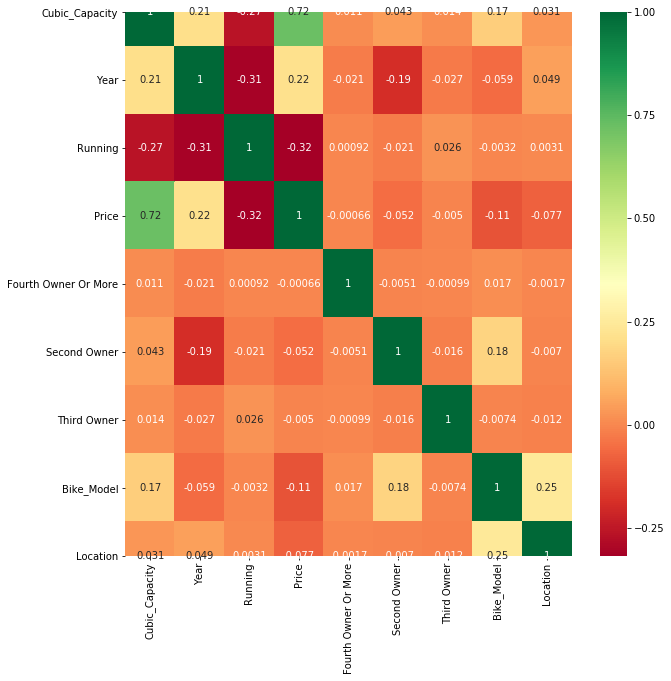

In [794]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn')

#### Model Building
Making final data frame to provide to the model

In [795]:
train_data=dataset.copy()

In [796]:
#Dropping all the unnecessary columns
train_data.drop(['Name','Model','Owner','Place'],axis=1,inplace=True)

In [797]:
train_data.head()

,Cubic_Capacity,Year,Running,Price,Fourth Owner Or More,Second Owner,Third Owner,Bike_Model,Location
0,110,2018,17654,35000,0,0,0,102,1166
1,350,2017,11000,119900,0,0,0,4249,7345
2,180,2017,16329,65000,0,0,0,1061,2781
3,150,2018,10000,80000,0,0,0,93,2781
4,150,2015,25000,53499,0,0,0,131,7345


In [798]:
X=train_data.drop('Price',axis=1)
y=train_data['Price']

In [799]:
X.rename(columns={'Fourth Owner Or More':'Fourth_owner_or_more','Second Owner':'Second_owner','Third Owner':'Third_owner'},inplace=True)

In [800]:
#Sorting the index value as it may affect our model
X.sort_index(axis=0,inplace=True)
y.sort_index(axis=0,inplace=True)

In [801]:
X=X[['Cubic_Capacity','Year','Running','Second_owner','Third_owner','Fourth_owner_or_more','Bike_Model','Location']]

In [802]:
from sklearn.model_selection import train_test_split

In [803]:
#Splitting data into train and test sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [804]:
X_train.head()

,Cubic_Capacity,Year,Running,Second_owner,Third_owner,Fourth_owner_or_more,Bike_Model,Location
7285,100,2016,4000,0,0,0,735,833
33121,220,2016,6600,0,0,0,4857,2054
7646,350,2015,13452,0,0,0,4249,809
19432,100,2013,22824,0,0,0,708,1692
13644,250,2015,10860,0,0,0,646,809


In [805]:
y_train.head()

7285      34200
33121     55005
7646      95000
19432     18000
13644    200000
Name: Price, dtype: int64

In [806]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(23840, 8) (23840,)
(10218, 8) (10218,)


In [807]:
#Initialising the model
import xgboost
xgb_reg=xgboost.XGBRegressor()

In [808]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [809]:
xgb_reg.score(X_test,y_test)

0.8680465913056294

In [810]:
y_pred=xgb_reg.predict(X_test)

In [811]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [812]:
print(mean_absolute_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

3259.5866716899714
0.8680465913056294


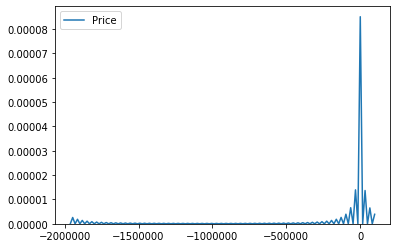

In [813]:
sns.kdeplot(y_test-y_pred)

In [814]:
#Parameters for hyper-parameter tuning
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators=[int (x) for x in np.linspace(start=100, stop=1200, num=12)]
max_depth=[int (x) for x in np.linspace(5,10,num = 10)]
learning_rate=[0.05,0.1,0.15,0.2]
min_child_weight=[1,2,3,4]

hyper_params={'n_estimators':n_estimators,'max_depth':max_depth,'learning_rate':learning_rate,
             'booster':booster,'base_score':base_score ,'min_child_weight':min_child_weight}


In [815]:
from sklearn.model_selection import RandomizedSearchCV

In [816]:
xgb_random=RandomizedSearchCV(estimator=xgb_reg,param_distributions=hyper_params,cv=5,n_iter=10,
                              scoring='neg_mean_absolute_error',verbose=2,return_train_score=True,random_state=100)

In [817]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5, total=   1.3s
[CV] n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5, total=   1.0s
[CV] n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5 
[CV]  n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5, total=   1.0s
[CV] n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5 
[CV]  n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5, total=   1.1s
[CV] n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5 
[CV]  n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.2, booster=gbtree, base_score=0.5, total=   1.0s
[CV] n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.15, booster=gblinear, base_score=0.5 
[16:01:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\

[CV]  n_estimators=1200, min_child_weight=3, max_depth=7, learning_rate=0.1, booster=gblinear, base_score=1, total=   1.4s
[CV] n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75, total=  12.8s
[CV] n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75, total=  14.3s
[CV] n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75, total=  15.0s
[CV] n_estimators=1200, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.75 
[CV]  n_estimators=1200, min_child_weight=2, max_depth=8, lear

[CV]  n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.25, total=   3.6s
[CV] n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.25 
[CV]  n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.25, total=   3.7s
[CV] n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.25 
[CV]  n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.05, booster=gbtree, base_score=0.25, total=   3.4s
[CV] n_estimators=500, min_child_weight=1, max_depth=8, learning_rate=0.1, booster=gblinear, base_score=1 
[16:04:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tre

[CV]  n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, booster=gblinear, base_score=0.75, total=   0.4s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                       

In [818]:
#Checking the best parameters
xgb_random.best_params_

{'n_estimators': 1200,
 'min_child_weight': 2,
 'max_depth': 8,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 0.75}

In [819]:
#Initialising a new model with best parameters
model=xgboost.XGBRegressor(n_estimators=1200,min_child_weight=2,max_depth=8,learning_rate=0.05,booster='gbtree',base_score=0.75)

In [820]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [821]:
model.score(X_test,y_test)

0.9234353146059877

In [823]:
prediction=xgb_random.predict(X_test)
print(mean_absolute_error(y_test,prediction))
print(metrics.r2_score(y_test,prediction))

3002.5588227094886
0.9234353146059877


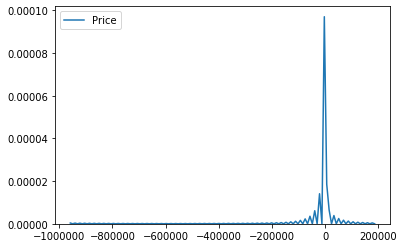

In [824]:
sns.kdeplot(y_test-prediction)

###### Now in order to improve the performance of the model I will be doing RandomizeSearchCV to get the best parameters for RandomForestRegressor

### Saving model

In [825]:
import pickle

In [828]:
#Creating a file
file=open('bike_price.pkl','wb')

#Dump model to the file
pickle.dump(model,file)

In [829]:
final_model=pickle.load(open('bike_price.pkl','rb'))

In [833]:
#NOTE: The XGBoost Regressor does not take input in the form of list.
#So we need to convert the input data either into DMatrix or pandas dataframe.
input_variables = pd.DataFrame([[150,2015,15000,0,1,0,176,7345]],
        columns=['Cubic_Capacity','Year','Running','Second_owner','Third_owner','Fourth_owner_or_more','Bike_Model','Location'],
        dtype=float)
my_prediction=final_model.predict(input_variables)
my_prediction
                        

array([33269.953], dtype=float32)

In [834]:
final_model.score(X_test,y_test)

0.9234353146059877